<a href="https://colab.research.google.com/github/Colsai/DATA602_DA_ML/blob/main/SH_Lecture_03_Logistic_Regression_and_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOGISTIC REGRESSION

In this second notebook, we are going to look at Logistic Regression. This is the counterpart to Linear Regression for classification problems. It's objective function is 

$$L(X, Y) = \frac{1}{n} \sum_{i=1}^n \log\left(1+\exp\left(w^T x^{(i)} \cdot y_i\right)\right) $$

It coresponds to learning a probability of $y_i$  being true (class $1$) or false (class $0$). 

In [ ]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.utils import shuffle #Creates different permutations of a matrix (reshuffles matrix)

In [ ]:
#Load the iris dataset
data = datasets.load_iris()

In [ ]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#Iris dataframe, np.c concatenates the data with the target data, and renames columns 'feature_names' + target
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
#Check if null
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
#Shuffles the matrix (if you don't do the shuffling; must show different varieties)
iris_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [ ]:
#Head of dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0.0
98,5.1,2.5,3.0,1.1,1.0
75,6.6,3.0,4.4,1.4,1.0
16,5.4,3.9,1.3,0.4,0.0
131,7.9,3.8,6.4,2.0,2.0


In [ ]:
iris_df[iris_df['target']==0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [ ]:
iris_df[iris_df['target']==1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [ ]:
iris_df[iris_df['target']==2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


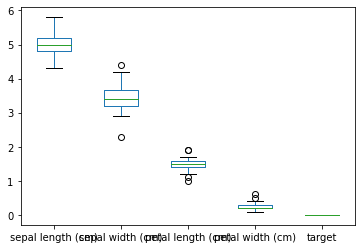

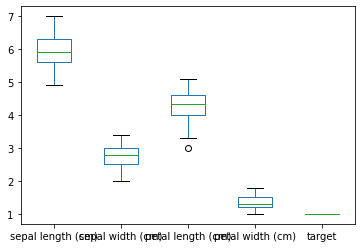

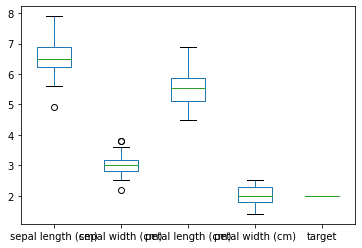

In [ ]:
#Boxplots of data
iris_df[iris_df['target']==0].plot.box()
iris_df[iris_df['target']==1].plot.box()
iris_df[iris_df['target']==2].plot.box()

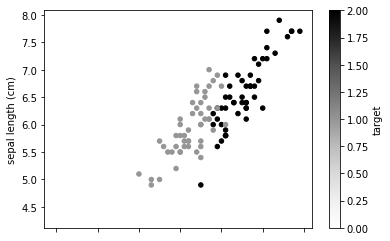

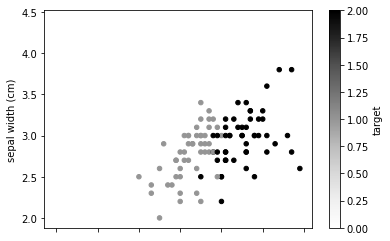

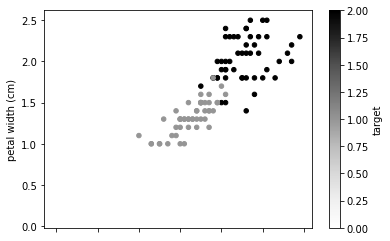

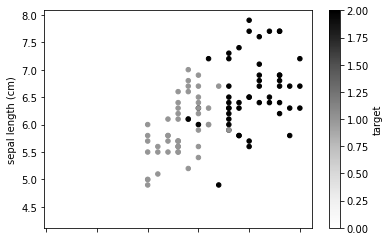

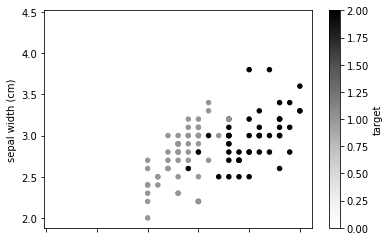

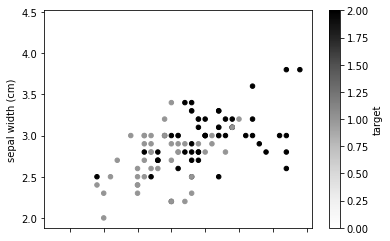

In [ ]:
#Correlation of different data elements
iris_df.plot.scatter(x='petal length (cm)',y='sepal length (cm)',c='target')
iris_df.plot.scatter(x='petal length (cm)',y='sepal width (cm)',c='target')
iris_df.plot.scatter(x='petal length (cm)',y='petal width (cm)',c='target')
iris_df.plot.scatter(x='petal width (cm)',y='sepal length (cm)',c='target')
iris_df.plot.scatter(x='petal width (cm)',y='sepal width (cm)',c='target')
iris_df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',c='target')
#help(iris_df.plot.scatter)

In [ ]:
# Make the data sets, train/test/validate
train_df = iris_df.iloc[0:100]
#test_df = iris_df.iloc[101:125]
val_df = iris_df.iloc[101:150]

In [ ]:
help(train_df.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivale

In [ ]:
#Fits logistic regression model
lr_orig = LogisticRegression()
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Print Accuracy
print(sum(lr_orig.predict(train_df.drop('target', axis=1))==train_df['target']), "/",len(train_df['target']))
print(sum(lr_orig.predict(val_df.drop('target', axis=1))==val_df['target']), "/", len(val_df['target']))

97 / 100
47 / 49


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0.0
98,5.1,2.5,3.0,1.1,1.0
75,6.6,3.0,4.4,1.4,1.0
16,5.4,3.9,1.3,0.4,0.0
131,7.9,3.8,6.4,2.0,2.0


## Homework:

- Try creating new features by multiplying/adding various current features together. (e.g. area = length*width)
- Can you do better?
- Create a dataframe using datasets.make_moons()
- Use a scatter plot to look at the data (use different colors for the classes)
- Train a logistic regession model on the data set.
- How does it do? can you make it perform better?

# Prediction (on Iris)
- Which target  was misclassified the most?
- What was it most likely to be classified as?
- ** Write a function which creates a 3 by 3 table such that:
  - row i column j is the number of elements of type i that were classified as type j
  - note the diagonal is the count of correctly classified elements.

In [ ]:
#Copy iris_df2 as iris_df
iris_df2 = iris_df
iris_df2['sepal area (cm2)'] = iris_df2['sepal width (cm)'] * iris_df2['sepal length (cm)']
iris_df2['petal area (cm2)'] = iris_df2['petal width (cm)'] * iris_df2['petal length (cm)']
iris_df2['total area (cm2)'] = (iris_df2['petal area (cm2)'] + iris_df2['sepal area (cm2)'])

# Make the data sets, train/test/validate
train_df2 = iris_df2.iloc[0:100]
#test_df = iris_df.iloc[101:125]
val_df2 = iris_df2.iloc[101:150]

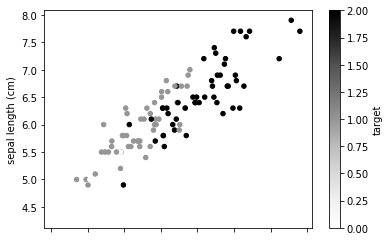

In [ ]:
#Correlation of different data elements
iris_df2.plot.scatter(x='total area (cm2)',y='sepal length (cm)',c='target')

#help(iris_df.plot.scatter)

In [ ]:
#Logistic Regression with 
lr_orig = LogisticRegression()
lr_orig.fit(train_df2.drop(['total area (cm2)', 'target'], axis=1),train_df2['target'])

print(sum(lr_orig.predict(train_df2.drop(['total area (cm2)', 'target'], axis=1))==train_df2['target']), "/",len(train_df2['target']))
print(sum(lr_orig.predict(val_df2.drop(['total area (cm2)', 'target'], axis=1))==val_df2['target']), "/", len(val_df2['target']))

99 / 100
46 / 49


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Better results for the test set, but worse results for the actual predicted values.

In [ ]:
pd.Series(lr_orig.predict(train_df2.drop(['total area (cm2)', 'target'], axis=1))==train_df2['target']).value_counts()

True     99
False     1
Name: target, dtype: int64

In [ ]:
#Test Df
test_df = pd.DataFrame()
test_df['Predicted'] = [elem for elem in lr_orig.predict(train_df2.drop(['total area (cm2)', 'target'], axis=1))]
test_df['Target'] = [elem2 for elem2 in train_df2['target']]
test_df

,Predicted,Target
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,2.0,2.0
...,...,...
95,2.0,2.0
96,1.0,1.0
97,2.0,2.0
98,2.0,2.0


In [ ]:
#Copy iris_df2 as iris_df
iris_df2 = iris_df
iris_df2['sepal area (cm2)'] = iris_df2['sepal width (cm)'] * iris_df2['sepal length (cm)']
iris_df2['petal area (cm2)'] = iris_df2['petal width (cm)'] * iris_df2['petal length (cm)']

In [ ]:
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal area (cm2),petal area (cm2),total area (cm2)
14,5.8,4.0,1.2,0.2,0.0,23.20,0.24,23.44
98,5.1,2.5,3.0,1.1,1.0,12.75,3.30,16.05
75,6.6,3.0,4.4,1.4,1.0,19.80,6.16,25.96
16,5.4,3.9,1.3,0.4,0.0,21.06,0.52,21.58
131,7.9,3.8,6.4,2.0,2.0,30.02,12.80,42.82
...,...,...,...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,2.0,17.64,7.65,25.29
137,6.4,3.1,5.5,1.8,2.0,19.84,9.90,29.74
72,6.3,2.5,4.9,1.5,1.0,15.75,7.35,23.10
140,6.7,3.1,5.6,2.4,2.0,20.77,13.44,34.21


** Write a function which creates a 3 by 3 table such that:
row i column j is the number of elements of type i that were classified as type j
note the diagonal is the count of correctly classified elements. **

See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
#This is a confusion matrix, which returns accuracy of predictions
import sklearn

def confusion_mat(target, predicted):
    return sklearn.metrics.confusion_matrix(target, predicted)

In [ ]:
confusion_mat(test_df['Target'], test_df['Predicted'])

array([[31,  0,  0],
       [ 0, 31,  1],
       [ 0,  0, 37]])

In [ ]:
'''
df_testvals = pd.DataFrame(lr_orig.predict(train_df2.drop('target', axis=1)))
df_testvals['Target'] = train_df2['target']
df_testvals
'''

"\ndf_testvals = pd.DataFrame(lr_orig.predict(train_df2.drop('target', axis=1)))\ndf_testvals['Target'] = train_df2['target']\ndf_testvals\n"

## Make_moons dataset (HW)
 1. Make dataset using datasets.make_moons()
 2. Use a scatterplot to look at the data
 3. Train a logistic regression model on the data set
 4. How does it do? Can you perform better?

In [ ]:
#1. Create a dataframe using datasets.make_moons()
data = datasets.make_moons(100)
mns_df = pd.DataFrame(data = np.c_[data[0], data[1]], columns = ["Feature_0", "Feature_1", "Target"])
mns_df.sample(5)

,Feature_0,Feature_1,Target
66,-0.900969,0.433884,0.0
87,-0.997945,0.064070,0.0
2,-0.761446,0.648228,0.0
96,1.222521,-0.474928,1.0
76,0.572117,0.820172,0.0


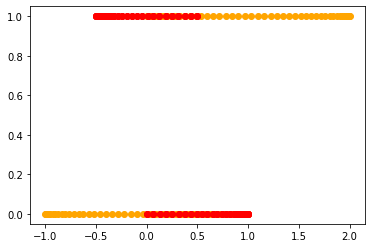

In [ ]:
#2. Scatterplot to look at the data
import matplotlib.pyplot as plt
plt.scatter(x = mns_df.Feature_0, y = mns_df.Target, color = 'orange')
plt.scatter(x = mns_df.Feature_1, y = mns_df.Target, color = 'r')

In [ ]:
# Make the data sets, train/test/validate
train_mns_df = mns_df.iloc[0:80]
test_mns_df = mns_df.iloc[80:100]

In [ ]:
#3. Train a logistic regression model on the data
lr_orig = LogisticRegression()
lr_orig.fit(train_mns_df.drop(['Target'], axis=1),train_mns_df['Target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## How did it do?
Check the accuracy

In [ ]:
#Prediction Estimates
print(f"Train Set: {sum(lr_orig.predict(train_mns_df.drop('Target', axis=1))==train_mns_df['Target'])}/{len(train_mns_df['Target'])}")
print(f"Test Set: {sum(lr_orig.predict(test_mns_df.drop('Target', axis=1))==test_mns_df['Target'])}/{len(test_mns_df['Target'])}")

Train Set: 67/80
Test Set: 20/20


In [ ]:
mns_df.head()

,Feature_0,Feature_1,Target
0,1.096023,-0.495379,1.0
1,1.926917,0.124733,1.0
2,-0.761446,0.648228,0.0
3,1.981559,0.308841,1.0
4,0.073083,0.124733,1.0


In [ ]:
#Attempt to improve performance
mnsb_df = mns_df

# Make the data sets, train/test/validate
train_mnsb_df = mnsb_df.iloc[0:80]
test_mnsb_df = mnsb_df.iloc[80:100]

lr_origb = LogisticRegression(class_weight='balanced', max_iter=5000)
lr_origb.fit(train_mnsb_df.drop(['Target'], axis=1),train_mns_df['Target'])

#Prediction Estimates
print(f"Train Set: {sum(lr_orig.predict(train_mnsb_df.drop('Target', axis=1))==train_mnsb_df['Target'])}/{len(train_mnsb_df['Target'])}")
print(f"Test Set: {sum(lr_orig.predict(test_mnsb_df.drop('Target', axis=1))==test_mnsb_df['Target'])}/{len(test_mnsb_df['Target'])}")

Train Set: 67/80
Test Set: 20/20


## Make_moons dataset

In [ ]:
help(datasets.make_moons)

Help on function make_moons in module sklearn.datasets._samples_generator:

make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.
    
    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.
    
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    Returns
    -------
    X : array of shape [n_samples, 2]
        The

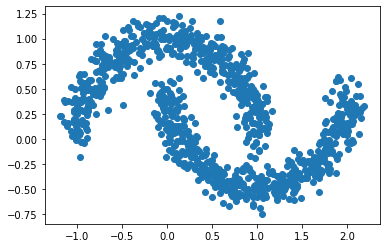

In [ ]:
d=datasets.make_moons(n_samples=1000, noise=0.1)
pyplot.scatter(x=d[0][::,0],y=d[0][::,1])

In [ ]:
X = d[0]
y = d[1]

X_train = X[0:700, :]
y_train = y[0:700]

X_test = X[700:, :]
y_test = y[700:]

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test, y_test)

0.8766666666666667

In [ ]:
X_train_p = np.zeros((X_train.shape[0], 10))
X_test_p = np.zeros((X_test.shape[0], 10))

In [ ]:
def addFeatures(X_orig, X_new):
  for row in range(X_orig.shape[0]):
    
    #First two features are just copies of the original two features 
    col = 0
  
    X_new[row, col] = X_orig[row, col]
    col += 1
  
    X_new[row, col] = X_orig[row, col]
    col += 1
    
    #Now we crate new features that do not exist in the original data
    
    X_new[row, col] = X_orig[row, 0]*X_orig[row, 0]
    col += 1
    
    X_new[row, col] = X_orig[row, 0]*X_orig[row, 1]
    col += 1
    
    X_new[row, col] = X_orig[row, 1]*X_orig[row, 1]
    col += 1
    
    
#     X_new[row, col] = np.sin(X_orig[row, 0])
#     col += 1
    
#     X_new[row, col] = np.sin(X_orig[row, 1])
#     col += 1
    
    num_cur_features = col
    for j in range(num_cur_features):
      X_new[row, col] = np.sin(X_new[row, j])
      col += 1
    

In [ ]:
addFeatures(X_train, X_train_p)
addFeatures(X_test, X_test_p)

In [ ]:
lr.fit(X_train_p, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test_p, y_test)

0.9733333333333334